Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


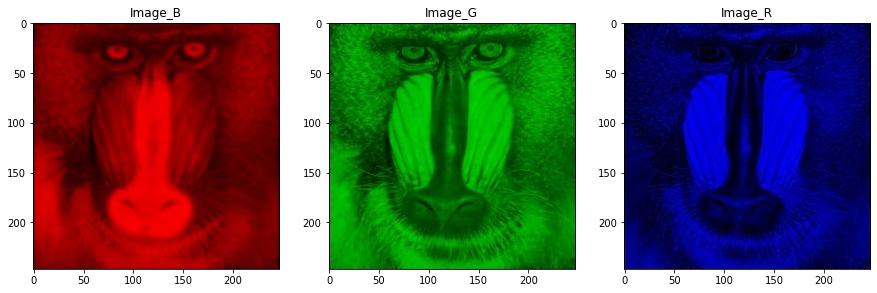

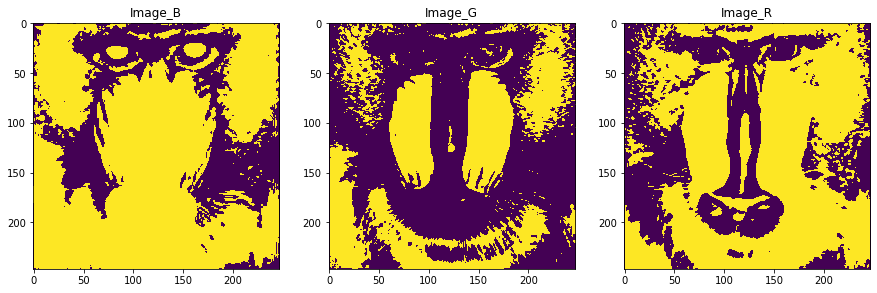

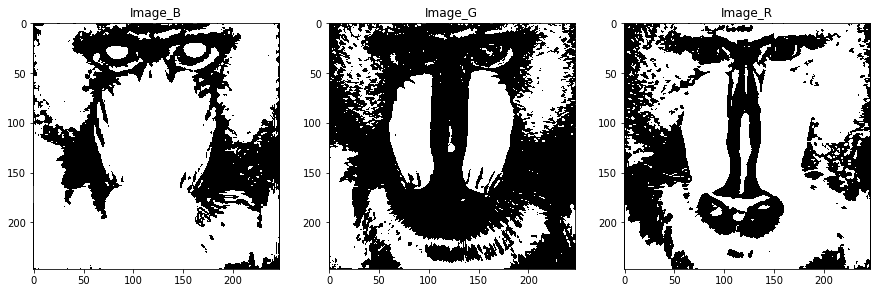

'\nplt.subplot(1,3,2)\nplt.title("Segmented Image")\nplt.imshow(B_output_img)\nplt.subplot(1,3,3)\nplt.title("Segmented Image")\nplt.imshow(B_output_img,cmap=\'gray\')\nplt.show()\n'

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img_B = cv2.imread('/content/gdrive/My Drive/Image-processing/B_baboon.bmp')
img_G = cv2.imread('/content/gdrive/My Drive/Image-processing/G_baboon.bmp')
img_R = cv2.imread('/content/gdrive/My Drive/Image-processing/R_baboon.bmp')

# color영상을 gray영상으로 만들기

B_img = cv2.cvtColor(img_B, cv2.COLOR_BGR2GRAY)
G_img = cv2.cvtColor(img_G, cv2.COLOR_BGR2GRAY)
R_img = cv2.cvtColor(img_R, cv2.COLOR_BGR2GRAY)

# 초기 임계값, 이전 임계값 저장 변수, 종료 조건 임계값 설정   
T1=50
T2=0
T0=1

# 임계값 적용 후 이진 영상을 담을 기억 장소 생성 
B_output_img =np.zeros((B_img.shape[0],B_img.shape[1]))
G_output_img =np.zeros((G_img.shape[0],G_img.shape[1]))
R_output_img =np.zeros((R_img.shape[0],R_img.shape[1]))

# 각 그룹별 평균값으로 새로운 임계값 계산하는 함수
def threshold_update(h, w, img_B, B_output_img,T1): #saturation함수로 정의하기
   sum1=0
   count1=1
   sum2=0
   count2=1
   for h in range(img_B.shape[0]):
    for w in range(img_B.shape[1]):
      # 그룹별 픽셀 총합 계산
      if(B_output_img[h,w]==255):
         sum1 = sum1+ img_B[h,w]
         count1 = count1+1
    else:
        sum2 = sum2+ img_B[h,w]
        count2 = count2+1
   # 그룹별 픽셀 평균 계산    
   ave1 = sum1/count1 
   ave2 = sum2/count2
   # 평균으로 새로운 임계값 계산
   T2 = np.int32(ave1+ave2)/2
   return T2

#1) 영상 초기 임계값 적용 하기
for h in range(B_img.shape[0]):
  for w in range(B_img.shape[1]):
    if(B_img[h,w]>T1):
        B_output_img[h,w]=255
    else:
        B_output_img[h,w]=0 

#2) 종료 조건을 만족할 때 까지 계속 반복
while True:
  #새로운 임계값 생성을 위한 함수 호출
  T2 = threshold_update(B_img.shape[0], B_img.shape[1], B_img, B_output_img,T1)
  #새로운 임계값과 이전 임계값의 변화 측정
  if(np.abs(T1-T2)<T0):
    # 종료 조건을 만족하면 새로운 임계값으로 영상 이진화 후 출력
    for h in range(B_img.shape[0]):
      for w in range(B_img.shape[1]):
        if(B_img[h,w]>T2):
          B_output_img[h,w]=255
        else:
          B_output_img[h,w]=0
    break
  #종료 조건을 만족하지 않는다면
  else:
     # 새로운 임계값으로 다시 이진화 작업
     T1 = T2
     for h in range(B_img.shape[0]):
      for w in range(B_img.shape[1]):
        if(B_img[h,w]>T1):
          B_output_img[h,w]=255
        else:
          B_output_img[h,w]=0

#-------------------------------------------------------------------------
# 각 그룹별 평균값으로 새로운 임계값 계산하는 함수 GGGGGG

#1) 영상 초기 임계값 적용 하기
for h in range(G_img.shape[0]):
  for w in range(G_img.shape[1]):
    if(G_img[h,w]>T1):
        G_output_img[h,w]=255
    else:
        G_output_img[h,w]=0 

#2) 종료 조건을 만족할 때 까지 계속 반복
while True:
  #새로운 임계값 생성을 위한 함수 호출
  T2 = threshold_update(G_img.shape[0], G_img.shape[1], G_img, G_output_img,T1)
  #새로운 임계값과 이전 임계값의 변화 측정
  if(np.abs(T1-T2)<T0):
    # 종료 조건을 만족하면 새로운 임계값으로 영상 이진화 후 출력
    for h in range(G_img.shape[0]):
      for w in range(G_img.shape[1]):
        if(G_img[h,w]>T2):
          G_output_img[h,w]=255
        else:
          G_output_img[h,w]=0
    break
  #종료 조건을 만족하지 않는다면
  else:
     # 새로운 임계값으로 다시 이진화 작업
     T1 = T2
     for h in range(G_img.shape[0]):
      for w in range(G_img.shape[1]):
        if(G_img[h,w]>T1):
          G_output_img[h,w]=255
        else:
          G_output_img[h,w]=0
#---------------------------------------------------------------

# 각 그룹별 평균값으로 새로운 임계값 계산하는 함수RRRRRRRR

#1) 영상 초기 임계값 적용 하기
for h in range(R_img.shape[0]):
  for w in range(R_img.shape[1]):
    if(R_img[h,w]>T1):
        R_output_img[h,w]=255
    else:
        R_output_img[h,w]=0 

#2) 종료 조건을 만족할 때 까지 계속 반복
while True:
  #새로운 임계값 생성을 위한 함수 호출
  T2 = threshold_update(R_img.shape[0], R_img.shape[1], R_img, R_output_img,T1)
  #새로운 임계값과 이전 임계값의 변화 측정
  if(np.abs(T1-T2)<T0):
    # 종료 조건을 만족하면 새로운 임계값으로 영상 이진화 후 출력
    for h in range(R_img.shape[0]):
      for w in range(R_img.shape[1]):
        if(R_img[h,w]>T2):
          R_output_img[h,w]=255
        else:
          R_output_img[h,w]=0
    break
  #종료 조건을 만족하지 않는다면
  else:
     # 새로운 임계값으로 다시 이진화 작업
     T1 = T2
     for h in range(R_img.shape[0]):
      for w in range(R_img.shape[1]):
        if(R_img[h,w]>T1):
          R_output_img[h,w]=255
        else:
          R_output_img[h,w]=0

#그림을 화면에 출력
plt.figure(figsize=(15,15))# 영상의 크기를 키워주자
plt.subplot(1,3,1)
plt.title("Image_B")
plt.imshow(img_B)
plt.subplot(1,3,2)
plt.title("Image_G")
plt.imshow(img_G)
plt.subplot(1,3,3)
plt.title("Image_R")
plt.imshow(img_R)
plt.show()

plt.figure(figsize=(15,15))# 영상의 크기를 키워주자
plt.subplot(1,3,1)
plt.title("Image_B")
plt.imshow(B_output_img)
plt.subplot(1,3,2)
plt.title("Image_G")
plt.imshow(G_output_img)
plt.subplot(1,3,3)
plt.title("Image_R")
plt.imshow(R_output_img)
plt.show()

plt.figure(figsize=(15,15))# 영상의 크기를 키워주자
plt.subplot(1,3,1)
plt.title("Image_B")
plt.imshow(B_output_img,cmap='gray')
plt.subplot(1,3,2)
plt.title("Image_G")
plt.imshow(G_output_img,cmap='gray')
plt.subplot(1,3,3)
plt.title("Image_R")
plt.imshow(R_output_img,cmap='gray')
plt.show()

'''
plt.subplot(1,3,2)
plt.title("Segmented Image")
plt.imshow(B_output_img)
plt.subplot(1,3,3)
plt.title("Segmented Image")
plt.imshow(B_output_img,cmap='gray')
plt.show()
'''

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


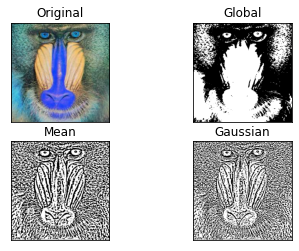

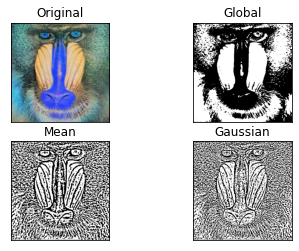

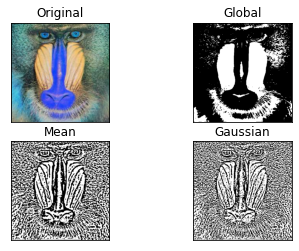

In [7]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive/') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image-processing/baboon.jpg', cv2.IMREAD_COLOR)

# BGR채널순서를 RGB채널로 변경
HSV_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# RGB 채널 나누기
H_img1,S_img1,V_img1=cv2.split(HSV_img1)


ret, th1 = cv2.threshold(H_img1,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(H_img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
th3 = cv2.adaptiveThreshold(H_img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

titles = ['Original','Global','Mean','Gaussian']
images = [img,th1,th2,th3]

for i in range(4):
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

ret, th1 = cv2.threshold(S_img1,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(S_img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
th3 = cv2.adaptiveThreshold(S_img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

titles = ['Original','Global','Mean','Gaussian']
images = [img,th1,th2,th3]

for i in range(4):
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

ret, th1 = cv2.threshold(V_img1,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(V_img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
th3 = cv2.adaptiveThreshold(V_img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

titles = ['Original','Global','Mean','Gaussian']
images = [img,th1,th2,th3]

for i in range(4):
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
)